In [44]:
import torch
import torch.nn as nn
import numpy as np

In [45]:
weight=torch.tensor([2,2])
print(weight)
print(weight.shape)

tensor([2, 2])
torch.Size([2])


Difference between torch.tensor and torch.Tensor is that<br>
Tensor is a constructor and is depricated.You can create a <br>
torch tensor by specifing its size->torch.Tensor(3,4) or by<br>
creating the tensor from the data itself torch.Tensor([2,2])<br>
whereas in torch.tensor, you can only create the tensor from the data-> torch.tensor([2,2])


In [46]:
torch.Tensor(3,4)

tensor([[3.7538e-34, 0.0000e+00, 3.4553e-34, 0.0000e+00],
        [1.1210e-43, 0.0000e+00, 8.9683e-44, 0.0000e+00],
        [3.7658e-34, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

#Creating embeddings
<p> Embeddings are basically lookup tables. It maps each input to a vector of embedding dimension.<br>
## Case 1->When embedding dimension 5 X 3 but i/p dim is 1 X 2

In [47]:
embedding = nn.Embedding(num_embeddings=5, embedding_dim=3)
output_embedding=embedding(weight)
output_embedding

tensor([[ 1.7223,  0.7466, -0.6251],
        [ 1.7223,  0.7466, -0.6251]], grad_fn=<EmbeddingBackward0>)

In [48]:
weight=torch.tensor([1,2,3,4,5])
weight

tensor([1, 2, 3, 4, 5])

## Case 2->When embedding dimension 5 X 3 but i/p dim is 1 X 4.You can only pass input to embedding till n=4, else we would get error

In [49]:
weight=torch.tensor([1,2,3,4])
embedding = nn.Embedding(num_embeddings=5, embedding_dim=3)
output_embedding=embedding(weight)
output_embedding

tensor([[ 0.0793,  0.3433, -0.9515],
        [ 0.9396,  0.9042, -0.8752],
        [-0.4516,  0.8003, -0.0048],
        [ 1.4691,  0.5383, -0.3199]], grad_fn=<EmbeddingBackward0>)

In [50]:
#error->index out of range in self
weight=torch.tensor([1,2,3,4,5])
embedding = nn.Embedding(num_embeddings=5, embedding_dim=3)
output_embedding=embedding(weight)
output_embedding

IndexError: index out of range in self

In [51]:
#Here input dim is 2*3 ,hence n=6 and no. of embedding is 7
#Hence, you can create embeddings till n=6
weight=torch.tensor([[1,2,3],[4,5,6]])
embedding = nn.Embedding(num_embeddings=7, embedding_dim=3)
output_embedding=embedding(weight)
output_embedding

tensor([[[-0.5220, -0.0947,  0.8940],
         [ 0.5418, -0.2623,  0.0467],
         [-0.1404,  1.7933, -0.2034]],

        [[ 1.1083, -0.6700, -0.5205],
         [ 0.1093, -0.2170,  2.2539],
         [ 0.0143,  0.0039, -0.2635]]], grad_fn=<EmbeddingBackward0>)

In [52]:
output_embedding[1][0]

tensor([ 1.1083, -0.6700, -0.5205], grad_fn=<SelectBackward0>)

#Parameter

torch.nn.Parameter is a specialized subclass of torch.Tensor in PyTorch, designed to explicitly define trainable parameters within a neural network module.<br>
When a torch.nn.Parameter is assigned as an attribute of an nn.Module, it is automatically added to the module's list of parameters.<br>
nn.Parameter is created with requires_grad=True

In [53]:
nn.Parameter(torch.Tensor(2,3))

Parameter containing:
tensor([[6.5236e+24, 4.4521e-41, 3.4773e-34],
        [0.0000e+00, 2.6229e-01, 4.6749e-02]], requires_grad=True)

In [54]:
#nn.Module is the base class for all neural networks. It contains neccessary parameters and methods
class CustomModel(nn.Module):
  def __init__(self):
    # Initializing parent class with child class constructor
    # Ensures attributes and methods of parent class (nn.Module) are properly setup
    # super(CustomModel,self).__init__() -> does the same job as super().__init__()
    super().__init__()
    self.weight=nn.Parameter(torch.Tensor([2,3,4,1]))
    self.bias=torch.randn(1)
  def forward(self,x):
    return x*self.weight
model=CustomModel()
#Only self.weight will be registered as parameter of CustomModel class
print(list(model.named_parameters()))

[('weight', Parameter containing:
tensor([2., 3., 4., 1.], requires_grad=True))]


# nn.Linear

Applies linear transformation to the input data<br>
y=x*W.T+b<br>
nn.Linear(input_dim,output_dim)
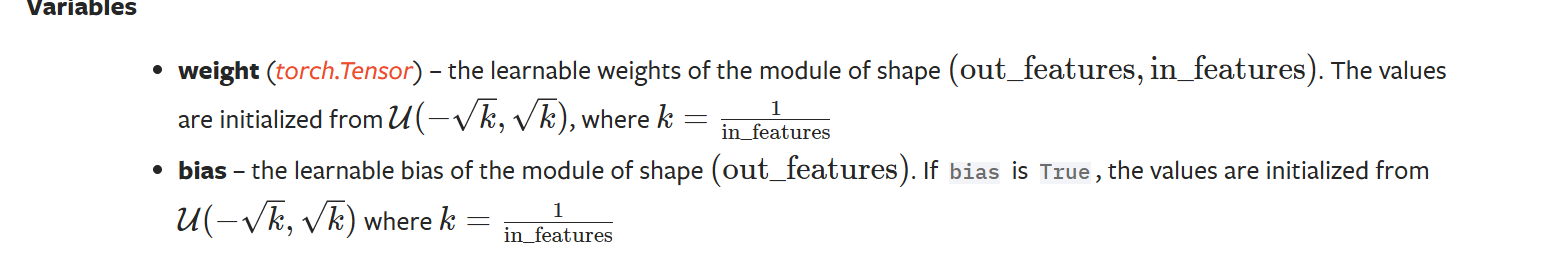

In [55]:
input=torch.randn(4,3) # 4 rows and 3 cols -> 4 datapoints and 3 features
linear_layer=nn.Linear(3,2) # 3 input features and 2 output cols
output=linear_layer(input)
print(output) #output dim is 4 X 2

tensor([[-1.0256, -0.0452],
        [-0.3241, -0.8337],
        [ 0.3460, -0.1179],
        [-1.0209, -0.4112]], grad_fn=<AddmmBackward0>)


In [56]:
#Checking
weight=linear_layer.weight #Dim 3 X 2
bias=linear_layer.bias #Dim 1 X 2
print(weight," ",bias)

Parameter containing:
tensor([[-0.1295, -0.2838,  0.5125],
        [ 0.5717, -0.1529, -0.0165]], requires_grad=True)   Parameter containing:
tensor([-0.0767, -0.2461], requires_grad=True)


In [57]:
y=input@weight.t()+bias
print(y)

tensor([[-1.0256, -0.0452],
        [-0.3241, -0.8337],
        [ 0.3460, -0.1179],
        [-1.0209, -0.4112]], grad_fn=<AddBackward0>)


In [65]:
#Custom Intitalization of weights and bias
sample_linear=nn.Linear(3,3)
sample_linear.weight.data.uniform_(-10,10)
if sample_linear.bias is not None:
    sample_linear.bias.data.uniform_(-8, 8)
print("Weights",sample_linear.weight)
print("Bias",sample_linear.bias)

Weights Parameter containing:
tensor([[ 9.2840, -1.9928, -0.5251],
        [ 3.9349, -5.1233, -8.4494],
        [-8.8879,  6.8081, -3.2403]], requires_grad=True)
Bias Parameter containing:
tensor([-7.1964,  5.1503, -7.1860], requires_grad=True)
